## Always first the libraries.
In this case tweepy is the API for twitter feed 

In [1]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


You must have a twitter account and sign that you will make "good use" of the information downloaded with the API.
Only then, they give an API_KEY and API_SECRET as the personal name. Additionally ACCESS_TOKEN and ACCESS_SECRET as the personal password.

In [0]:
### API KEY = HsfC2WRUjVA0tm3yjEjmabnx6
### API SECRET = 4lJpDt0rqhtMakPhTkyoAS6PPV5l6fHkDvJD9PtxiHEjU6SRtl
# Consumer:
CONSUMER_KEY    = 'HsfC2WRUjVA0tm3yjEjmabnx6'
CONSUMER_SECRET = '4lJpDt0rqhtMakPhTkyoAS6PPV5l6fHkDvJD9PtxiHEjU6SRtl'

## ACCESS TOKEN = 2358358176-WNJkOJWKVevGnk3miX8Kk4nwWU46pULHSm4Mkrc
## ACCESS TOKEN SECRET = VfONCGt48ramQoeAJKW0Ci9kN3rCeSA9oHh9LAYdeZI3G
# Access:
ACCESS_TOKEN  = '2358358176-WNJkOJWKVevGnk3miX8Kk4nwWU46pULHSm4Mkrc'
ACCESS_SECRET = 'VfONCGt48ramQoeAJKW0Ci9kN3rCeSA9oHh9LAYdeZI3G'


credentials library is used to authenticate in the twitter account

In [3]:
!pip install credentials
from credentials import *    # This will allow us to use the keys as variables
# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

Extractor is the obect to obtain the data for a twitter account, for example we search for the Bitcoin account and fetch the latest 200 tweets.

In [4]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="Bitcoin", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

# Additionally there is some interesting data in the tweets
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

Number of tweets extracted: 200.

5 recent tweets:

RT @cryptograffiti: ₿ Strong 💪 https://t.co/hOrRPlypqt

RT @Melt_Dem: plug the money printer back in, guys

need some more brrr https://t.co/f265CC5nQK

RT @lightning: 1/ Today we're announcing the first release of Faraday.🔌

Faraday is a tool intended to help node operators better manage th…

RT @SGBarbour: People are naturally far better at saving money than investing it, which is one reason why bitcoin will destroy fiat money.

Bitcoin is a necessity, because money is a necessity, and fiat currencies are broken.

1245806733089321001
2020-04-02 20:14:05
TweetDeck
0
62
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'cryptograffiti', 'name': 'cryptograffiti', 'id': 2384348287, 'id_str': '2384348287', 'indices': [3, 18]}], 'urls': [], 'media': [{'id': 1245724888993693696, 'id_str': '1245724888993693696', 'indices': [31, 54], 'media_url': 'http://pbs.twimg.com/media/EUm0L7hVAAAP_YA.jpg', 'media_url_https': '

We create a pandas dataframe, to store the information of the tweets


In [5]:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))


,Tweets
0,RT @cryptograffiti: ₿ Strong 💪 https://t.co/hO...
1,"RT @Melt_Dem: plug the money printer back in, ..."
2,RT @lightning: 1/ Today we're announcing the f...
3,RT @SGBarbour: People are naturally far better...
4,"Bitcoin is a necessity, because money is a nec..."
5,🦖 = Fiat money \n☄️ = Bitcoin
6,RT @pierre_rochard: Bitcoin is a global phenom...
7,RT @Vis_in_numeris: Federal Reserve just print...
8,Please consider donating to the Hardcore Fund ...
9,RT @100trillionUSD: #Bitcoin halving .. 1 mont...


Then we add some information of interest to the DataFrame as, lenght of tweet, ID, Date, twitter source, number of likes and Retweets   

In [6]:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,RT @cryptograffiti: ₿ Strong 💪 https://t.co/hO...,54,1245806733089321001,2020-04-02 20:14:05,TweetDeck,0,62
1,"RT @Melt_Dem: plug the money printer back in, ...",95,1245806643926855680,2020-04-02 20:13:44,TweetDeck,0,70
2,RT @lightning: 1/ Today we're announcing the f...,140,1245806576700547072,2020-04-02 20:13:28,TweetDeck,0,41
3,RT @SGBarbour: People are naturally far better...,138,1245806366884630529,2020-04-02 20:12:38,TweetDeck,0,37
4,"Bitcoin is a necessity, because money is a nec...",85,1245727689845149696,2020-04-02 15:00:00,TweetDeck,825,211
5,🦖 = Fiat money \n☄️ = Bitcoin,28,1245698748702842882,2020-04-02 13:05:00,TweetDeck,1031,246
6,RT @pierre_rochard: Bitcoin is a global phenom...,139,1245392458789380098,2020-04-01 16:47:55,TweetDeck,0,111
7,RT @Vis_in_numeris: Federal Reserve just print...,140,1245392421569146882,2020-04-01 16:47:46,TweetDeck,0,138
8,Please consider donating to the Hardcore Fund ...,139,1245350205207097344,2020-04-01 14:00:01,TweetDeck,85,32
9,RT @100trillionUSD: #Bitcoin halving .. 1 mont...,139,1245350036218806272,2020-04-01 13:59:20,TweetDeck,0,495


As an example we can print the lenght average of the tweets

In [7]:
mean = np.mean(data['len'])
print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 101.665


To extract more data, we will use some pandas' functionalities:
We could restrict to just tweets with more than average retweets or likes, and avoid too short tweets. Or we could give weights to tweets according to retweets or likes.

Next we search for the tweets with the most likes and retweets and print the information.

In [8]:
fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
Retweet if you're still hodling. 🙏🏽
Number of likes: 5047
35 characters.

The tweet with more retweets is: 
RT @Snowden: This is the first time in a while I've felt like buying bitcoin. That drop was too much panic and too little reason.
Number of retweets: 5057
129 characters.



Next to process the data in form of a graph, we plot the likes, lenght and retweet vs the dates.

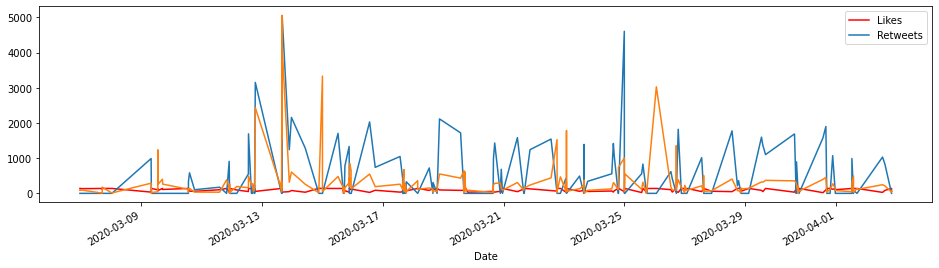

In [9]:
tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])
tlen.plot(figsize=(16,4), color='r');
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

If we need the sources of the data, we could print these

In [10]:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* TweetDeck


The percentage of information from different sources can be plotted in a pie chart.

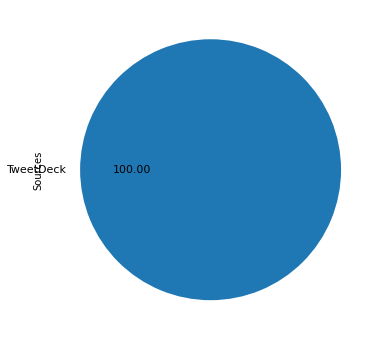

In [11]:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));


## Sentiment analysis 

To perform the sentiment analysis we will use the TextBlob API, and for the text parser we use the regex re library.   

In [0]:
from textblob import TextBlob
import re

Function to clean a tweet, from non needed characters 

In [0]:
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

To analize the sentiment we first clean the tweet an then use the TextBlob function, which returns Polarity and sensibility. The polarity score is a float within the range $[-1.0, 1.0]$. The subjectivity is a float within the range $[0.0, 1.0]$, where $0.0$ is very objective and $1.0$ is very subjective.

In this simple example we just use the polarity, but we could add the subjectivity variable.

(more information in the [TextBlob web page](https://textblob.readthedocs.io/en/dev/quickstart.html)).


In [0]:
def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

We then add the column $SA$ containing the sentiment analysis, for each of the tweets in our DataFrame. 

In [15]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,RT @cryptograffiti: ₿ Strong 💪 https://t.co/hO...,54,1245806733089321001,2020-04-02 20:14:05,TweetDeck,0,62,1
1,"RT @Melt_Dem: plug the money printer back in, ...",95,1245806643926855680,2020-04-02 20:13:44,TweetDeck,0,70,1
2,RT @lightning: 1/ Today we're announcing the f...,140,1245806576700547072,2020-04-02 20:13:28,TweetDeck,0,41,1
3,RT @SGBarbour: People are naturally far better...,138,1245806366884630529,2020-04-02 20:12:38,TweetDeck,0,37,1
4,"Bitcoin is a necessity, because money is a nec...",85,1245727689845149696,2020-04-02 15:00:00,TweetDeck,825,211,-1
5,🦖 = Fiat money \n☄️ = Bitcoin,28,1245698748702842882,2020-04-02 13:05:00,TweetDeck,1031,246,0
6,RT @pierre_rochard: Bitcoin is a global phenom...,139,1245392458789380098,2020-04-01 16:47:55,TweetDeck,0,111,0
7,RT @Vis_in_numeris: Federal Reserve just print...,140,1245392421569146882,2020-04-01 16:47:46,TweetDeck,0,138,0
8,Please consider donating to the Hardcore Fund ...,139,1245350205207097344,2020-04-01 14:00:01,TweetDeck,85,32,0
9,RT @100trillionUSD: #Bitcoin halving .. 1 mont...,139,1245350036218806272,2020-04-01 13:59:20,TweetDeck,0,495,0


post_tweets contains the information of tweets with positive sentiment, neu_tweets contains the information of tweets with neutral sentiment, and neg_tweets contains the information of tweets with negative sentiment. 

In [0]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]


Finallly we make a desicion based on the percentages of positive, neutral and negative, tweets.

In [19]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))


Percentage of positive tweets: 33.5%
Percentage of neutral tweets: 51.0%
Percentage de negative tweets: 15.5%


## Strategy

To create the strategy we have to make a desicion of the daily sentiment to do so we divide the DataFrame information by dates.

At each day we will aggregate the sum of the polarity as 'Twit_SA'. 

Additionally we make use of the data in likes and RT's, thus first we update this info as a percentage and then in 'cDate' we store a convex combination of the percentage likes and percentage RT's, directioned to the polarity of the Tweet **(This for each tweet)**, and in 'Twit_SApav' we store the aggregate sum of the day.  


In [20]:
from datetime import datetime
from datetime import timedelta

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

dateT = (data['Date'][0]).replace(hour=11, minute=59, second=59)
date0 = (data['Date'][len(data)-1]).replace(hour=0, minute=0, second=0)
datei = date0
#Dataframe to store the results
TwitStrategy = pd.DataFrame([], columns=['Date','Twit_SA', 'Twit_SApav'])
while datei <= dateT:
  daydata = data[(data['Date']>datei) & (data['Date']<datei+timedelta(days=1) )]
  ## These follwing two lines produce some warnings, I'm still working on the reason
  daydata.loc[:,'Likes'] = daydata.loc[:,'Likes']/ fav_max
  daydata['RTs'] = daydata['RTs']/ rt_max
  #####
  daySA = daydata['SA'].sum()
  daydata['cDate'] = (0.3*daydata['Likes']+ 0.7*daydata['RTs'])*daydata['SA'] 
  daySApav = daydata['cDate'].sum()
  TwitStrategy = TwitStrategy.append({'Date':datei, 'Twit_SA': daySA, 'Twit_SApav': daySApav}, ignore_index=True)
  datei = datei+timedelta(days=1)

display(TwitStrategy)


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,Date,Twit_SA,Twit_SApav
0,2020-03-06,0,-0.001799
1,2020-03-07,2,0.024916
2,2020-03-08,1,0.001523
3,2020-03-09,4,0.266462
4,2020-03-10,3,0.106198
5,2020-03-11,-3,-0.068837
6,2020-03-12,0,0.141867
7,2020-03-13,3,0.722978
8,2020-03-14,1,0.002492
9,2020-03-15,5,0.731662


The strategy consists in making decisions acording to the data in Twit_SA and/or Twit_SApav

# Mount the drive

This to retreive information fron the stock.

In [21]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/AT/Librerias'
#%ls
!pip install import_ipynb
import import_ipynb

from datetime import datetime
import yahoo_reader as yr 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/AT/Librerias
  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=1f2da81935e0a863e4d7e1298bab97e5f07628b3ddbb99b391baf8545080bec5
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb
importing Jupyter notebook from yahoo_reader.ipynb


# Backtest

We perform a small backtest to try both strategies. We could even create one with Z-scores normalizing the data in Twit_SA and Twit_SApav.

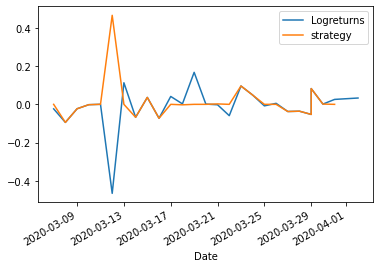

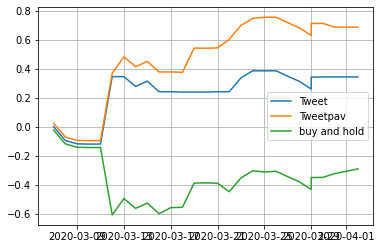

In [31]:
#TwitStrategy.set_index('Date', inplace = True)
mydata = yr.odata('BTC-USD', date0,dateT)
# Calculate the signals
TwitStrategy['signalSA'] = np.sign(TwitStrategy['Twit_SA'])
TwitStrategy['signalSApav'] = np.sign(TwitStrategy['Twit_SApav'])
# This have to be made only once to set the index in the date to perform the 
# Vector products.
#TwitStrategy.set_index('Date', inplace = True)
log_ret = np.log(mydata['Adj Close']).diff()
r_s = TwitStrategy['signalSA'].shift(1) * log_ret
r_s2 = TwitStrategy['signalSApav'].shift(1) * log_ret
log_ret.plot(label="Logreturns")
r_s.plot(label="strategy")
plt.legend()
plt.show()
  ## Calculate the cumulative log returns
cum_ret = (r_s.cumsum()).dropna()
cum_ret2 = (r_s2.cumsum()).dropna()
nost_cum_ret = (log_ret.cumsum()).dropna()

plt.plot(cum_ret.index, cum_ret, label='Tweet')
plt.plot(cum_ret2.index, cum_ret2, label='Tweetpav')
plt.plot(nost_cum_ret.index, nost_cum_ret, label='buy and hold')
plt.legend(loc='best')
plt.grid()
plt.show()